## ระบบที่มีพลังงานศักย์เป็นคาบ
$$
\begin{align}
V(r) &= V(r+R)
\end{align}
$$
โดยที่ฟังก์ชันคลื่นจะเป็นไปตามเงื่อนไขของ Bloch
$$
\begin{align}
\psi_{k}(r) = u_k(r)e^{ikr}
\end{align}
$$
เมื่อ $u_k(r)$ เป็นฟังก์ชันที่มีลักษณะเป็นคาบตามเงื่อนไข $u_k(r)=u_k(r+R)$ ดังนั้น
$$
\begin{align}
\psi_k (r+R) &= u_k(r+R)e^{ik(r+R)} \\
&= u_k(r)e^{ikr}e^{ikR} \\
&= \psi_k(r)e^{ikR}
\end{align}
$$
### จากระเบียบวิธีผลต่างจำกัด (Finite Difference Method) ของสมการชโรดิงเจอร์ใน 1 มิติ
$$
\begin{align}
-f\psi_{k,n-1}+(2f+V_n)\psi_{k,n}-f\psi_{k,n+1} &= E_k\psi_n
\end{align}
$$
### เมื่อ $f=\frac{\hbar^2}{2m(\Delta x)^2}$
$$
\begin{align}
-f\psi_0+(2f+V_1)\psi_1-f\psi_2 &= E\psi_1 \\
-f\psi_1+(2f+V_2)\psi_2-f\psi_3 &= E\psi_2 \\
\vdots &= \vdots \\
-f\psi_{N-2}+(2f+V_{N-1})\psi_{N-1}-f\psi_{N} &= E\psi_{N-1} \\
-f\psi_{N-1}+(2f+V_{N})\psi_{N}-f\psi_{N+1} &= E\psi_{N}
\end{align}
$$
โดยมีเงื่อนไขว่า $\psi_0 = \psi_N e^{-ikR}$ และ $\psi_{N+1}=\psi_1e^{ikR}$ สามารถเขียนในรูปของเมทริกซ์ได้ดังนี้
$$
\begin{bmatrix} 
2f+V_1 & -f & 0 & 0 & \cdots & 0 & 0 & -fe^{-ikR} \\
-f & 2f+V_2 & -f & 0 & \cdots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & -f &2f+V_{N-1} & -f \\
-fe^{ikR} & 0 & 0 & 0 & \cdots & 0 & -f & 2f+V_{N}
\end{bmatrix}
\begin{bmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_{N-1} \\
\psi_{N}
\end{bmatrix}=E
\begin{bmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_{N-1} \\
\psi_{N}
\end{bmatrix}
$$

## ฟังก์ชันคลื่น (k)
ตำแหน่งที่อยู่ในปริภูมิส่วนกลับ (reciprocal space) โดยในทางปฏิบัติแล้วเรามักพิจารณา k ภายในช่วง $1^{st}$ Brillouin Zone
พิจารณาใน 1 มิติ k จะอยู่ในช่วง $k=-\frac{\pi}{L}$ ถึง $k=\frac{\pi}{L}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L = 1 # angstrom
N = 100
delta_x = L/N # angstrom
x_points = np.arange(0,L,delta_x)
k_points = np.linspace(-np.pi/L,np.pi/L,N)
band = np.zeros((state,N))
f = 3.8058/(delta_x**2.0) # eV
i = complex(0,1)

## กำหนด ตัวดำเนินการพลังงานศักย์ (V) ในรูปของเมทริกซ์

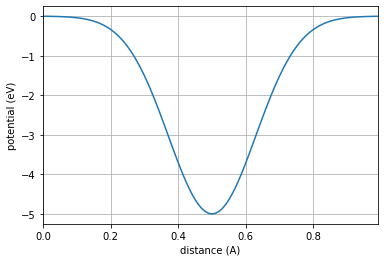

In [22]:
V = -5*np.exp(-30*(x_points-L/2.0)**2.0) # eV
plt.plot(x_points,V) # plot the potential energy
plt.ylabel('potential (eV)')
plt.xlabel('distance (A)')
plt.grid()
plt.xlim(x_points[0],x_points[N-1])
plt.show()

## กำหนดตัวดำเนินการเฮมิลโตเนียน (T+V) ในรูปของเมทริกซ์

In [23]:
state = 3
H = np.zeros((N,N),dtype=complex)
k = 0
for k_vec in k_points:
    for index in range(N):
        if index+1 < N:
            H[index,index+1] = -f
            H[index+1,index] = -f
        else:
            H[0,index] = -f*np.exp(-i*k_vec*L)
            H[index,0] = -f*np.exp(i*k_vec*L)
        H[index,index] = 2*f+V[index]
    val, vec = np.linalg.eig(H)
    val.sort()
    for n in range(state):
        band[n,k] = val[n].real
    k +=1

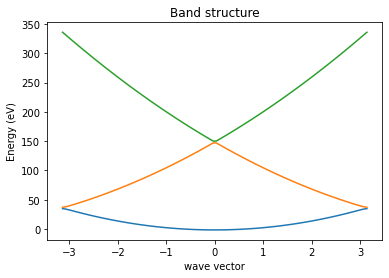

In [24]:
for index in range(state):
    plt.plot(k_points, band[index,:], label='state {}'.format(index+1))
plt.title("Band structure")
plt.xlabel("wave vector")
plt.ylabel("Energy (eV)")
plt.show()